<a href="https://colab.research.google.com/github/heyggun/Data_EDA/blob/main/%ED%98%84%EC%9E%A5%EC%97%90%EC%84%9C_%EB%B0%94%EB%A1%9C_%EC%8D%A8%EB%A8%B9%EB%8A%94_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_with_%ED%8C%8C%EC%9D%B4%EC%8D%AC_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 현장에서 바로 써먹는 데이터 분석 with 파이썬
### chapter 6. 분류 및 군집분석

p.222 Q.병아리의 성별을 구분할 수 있을까?(로지스틱 회귀)

- 로지스틱 회귀(Logistic Regression) : 독립변수(x)의 선형 결합을 이용해 사건의 발생 가능성(확률)을 예측하는 데 사용되는 기법
- 종속변수(y)가 수치형이 아닌 이산형(0 또는 1)일 경우 사용하며, 종속변수가 2개 이상의 범주를 갖는 경우에도 활용 가능
- 로지스틱 회귀의 결과는 사건이 일어날 확률(Y=1)로 나타냄

In [2]:
import pandas as pd
g = pd.read_csv('ch6-1.csv')
g.head()

,wing_length,tail_length,gender
0,44,9,m
1,42,9,m
2,43,8,m
3,40,10,m
4,44,8,m


- 병아리의 날개 길이(wing_length)
- 꽁지깃 길이(tail_length)
- 성별(gender)

In [3]:
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wing_length  60 non-null     int64 
 1   tail_length  60 non-null     int64 
 2   gender       60 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.5+ KB


In [4]:
g['gender'] = g['gender'].map({'m':1, 'f':0})
g.head()

,wing_length,tail_length,gender
0,44,9,1
1,42,9,1
2,43,8,1
3,40,10,1
4,44,8,1


**로지스틱 회귀분석**은 statsmodels의 패키지의 Logit.from_formula() 함수 사용

- 병아리의 성별(gender)를 y로 두고, 날개 길이(wing_length)와 꽁지깃 길이(tial_length)를 각각 독립변수 x1, x2로 설정해 로지스틱 회귀모델을 만들어 model_glm 이라는 변수로 지정하고 fit() 메소드를 이용해 모델 학습

In [5]:
# 로지스틱 회귀 구현을 위한 모듈

import statsmodels.api as sm

# 모델 구축 및 학습

model_glm = sm.Logit.from_formula('gender ~ wing_length + tail_length', data=g).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.137215
         Iterations 9


In [6]:
model_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 gender   No. Observations:                   60
Model:                          Logit   Df Residuals:                       57
Method:                           MLE   Df Model:                            2
Date:                Thu, 14 Jul 2022   Pseudo R-squ.:                  0.8020
Time:                        23:37:40   Log-Likelihood:                -8.2329
converged:                       True   LL-Null:                       -41.589
Covariance Type:            nonrobust   LLR p-value:                 3.264e-15
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      70.1955     23.410      2.999      0.003      24.313     116.078
wing_length    -1.0531      0.505     -2.087      0.037      -2.042      -0.064
tail_length    -2.3859      0.969     -2.462      0.014      -4.285      -0.486
===============================================================================
"""

- 개별 독립 변수의 p값 판정을 통해 통계적으로 유의한 변수인지 확인 함
- 날개길이(wing_length)와 꽁지깃 길이(tail_length) 두 변수 모두 p 값이 0.037, 0.014로 0.05보다 작기 때문에 유의수준 5% 하에서 통계적으로 유의함
- coef(coefficient) 값으로 모델을 수식으로 표현하면
- P(Y=1|x) = 1/1+e^-(70.1955-1.0531*x1 - 2.3859*x2)

**분류 알고리즘의 성능 평가**

- 정오분류표, ROC 커브 사용(AUC)

In [7]:
# 로지스틱 회귀 모델 성능 평가

y_prob = model_glm.predict(g.iloc[:,0:2])

# 예측값(확률) 확인
y_prob.head()

0    0.915579
1    0.988904
2    0.997049
3    0.985377
4    0.991588
dtype: float64

In [8]:
y_pred = list(map(round,y_prob))
y_pred[0:5]

[1, 1, 1, 1, 1]

In [9]:
# 기준값인 gender열을 별도 y에 저장
y = g['gender']

In [10]:
# 정오분류표 함수 불러오기

from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred, labels=[1,0])

array([[28,  2],
       [ 1, 29]])

In [11]:
# 분류 리포트 함수 불러오기

from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.97      0.93      0.95        30

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



-> 정확도가 95%, 1을 기준으로 민감도가 93%, 정밀도가 97%

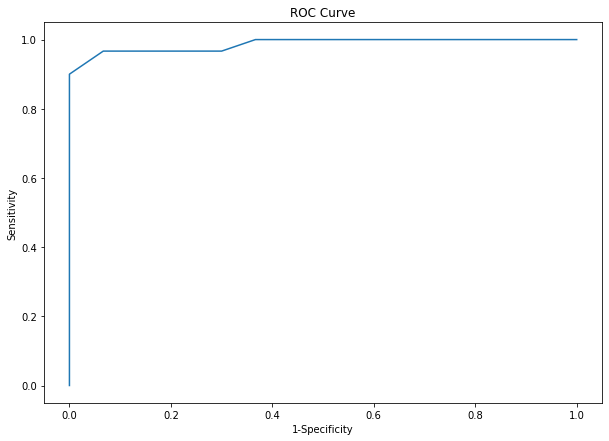

In [12]:
# Roc 커브를 그리기 위한 함수

from sklearn.metrics import roc_curve

# roc 커브를 그리기 위한 변수 설정

fpr, tpr, thresholds = roc_curve(y,y_prob)


# roc 커브 그리기

import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [13]:
# AUC 계산을 위한 함수
from sklearn.metrics import auc

# auc 계산
auc(fpr,tpr)

0.9866666666666667

-> ROC 커브의 아래 면적인 AUC 값이 .987로 1에 매우 가까운 높은 값이 나옴

p.234 Q. 병아리의 품종을 구분할 수 있을까?(분류 알고리즘)

**나이브 베이즈 분류(Naive Bayes Classification)**
- 베이즈 정리를 적용한 확률 분류 기법
- 베이즈 정리는 조건부 확률을 구하는 공식으로, 조건부 확률은 사건 B가 일어났다는 조건하에 사건 A가 일어날 확률을 P(A|B)라고 표현함

In [14]:
df_train = pd.read_csv('ch6-2_train.csv')
df_test = pd.read_csv('ch6-2_test.csv')

display(df_train.head(3))
display(df_test.head(3))

,wing_length,tail_length,comb_height,breeds
0,238,63,34,a
1,236,67,30,a
2,256,65,34,a


,wing_length,tail_length,comb_height,breeds
0,258,67,32,a
1,260,64,34,a
2,251,63,31,a


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wing_length  240 non-null    int64 
 1   tail_length  240 non-null    int64 
 2   comb_height  240 non-null    int64 
 3   breeds       240 non-null    object
dtypes: int64(3), object(1)
memory usage: 7.6+ KB


In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wing_length  60 non-null     int64 
 1   tail_length  60 non-null     int64 
 2   comb_height  60 non-null     int64 
 3   breeds       60 non-null     object
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


- 날개 길이(wing_length)
- 꽁지깃 길이(tail_length)
- 볏 높이(comb_height)
- 품종(breeds)

In [17]:
x_train = df_train.iloc[:,0:3].values
y_train = df_train.iloc[:,3].values

x_test = df_test.iloc[:,0:3].values
y_test = df_test.iloc[:,3].values

In [18]:
# 나이브 베이즈 알고리즘 수행을 위한 함수

from sklearn.naive_bayes import GaussianNB

In [19]:
model_nb = GaussianNB().fit(x_train, y_train)

In [20]:
# 예측값 생성
y_pred_nb = model_nb.predict(x_test)

# 예측값 확인
y_pred_nb

array(['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'c', 'b', 'b', 'b', 'b', 'c', 'b', 'b', 'b', 'b', 'b',
       'a', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'b',
       'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c'], dtype='<U1')

In [21]:
# 예측 결과 평가
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_nb)

array([[20,  0,  0],
       [ 1, 17,  2],
       [ 0,  1, 19]])

- 총 60개의 데이터 중에 56개 (20+17+19) 개를 맞게 분류함

In [22]:
# 예측결과평가

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.94      0.85      0.89        20
           c       0.90      0.95      0.93        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



0> 품종에 따른 정밀도가 최소 0.85 이상으로 높은 편임

**k-최근접 이웃**

- k-최근접 이웃(k-NN, k-Nearest Neighbor) : 머신러닝 알고리즘, 새로운 데이터에 대해 이와 가장 거리가 가까운 k개의 과거 데이터의 결과를 이용해 다수결로 분류하는 방법

In [23]:
# k-nn 알고리즘 수행을 위한 함수
from sklearn.neighbors import KNeighborsClassifier

#모델 구축(k=3)
model_knn =  KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
y_pred_knn = model_knn.predict(x_test)
y_pred_knn = model_knn.predict(x_test)


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_knn)

array([[19,  1,  0],
       [ 1, 17,  2],
       [ 0,  1, 19]])

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           a       0.95      0.95      0.95        20
           b       0.89      0.85      0.87        20
           c       0.90      0.95      0.93        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



-> 정확도 90% 나이브베이즈 알고리즘 대비 다소 낮음

In [26]:
# 모델 구축(k=5) 학습

model_knn_5 = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
y_pred_knn5 = model_knn_5.predict(x_test)

In [27]:
confusion_matrix(y_test, y_pred_knn5)

array([[20,  0,  0],
       [ 1, 16,  3],
       [ 0,  2, 18]])

In [28]:
print(classification_report(y_test, y_pred_knn5))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.89      0.80      0.84        20
           c       0.86      0.90      0.88        20

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



- 정확도 92%로 k=3일 경우보다 다소 향상됨
- k-nn은 '거리 기반' 알고리즘이므로 독립변수를 스케일링한 후 학습시키는 것이 바람직함

**의사결정나무**
- 주어진 독립변수에 의사결정규칙을 적용해 나가면서 종속변수를 예측해 나가는 알고리즘
- 종속변수가 범주형이나 연속형일 경우 모두 사용할 수 있고, 분석 겨로가가 조건 형태로 출력되기 때문에 모델을 이해하기 쉬움

In [29]:
# 의사결정 나무 알고리즘 수행 및 시각화를 위한 함수

from sklearn.tree import DecisionTreeClassifier, plot_tree

In [30]:
# 모델 구축 및 학습
model_tree = DecisionTreeClassifier().fit(x_train, y_train)
y_pred_tree = model_tree.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_tree)

array([[20,  0,  0],
       [ 1, 18,  1],
       [ 0,  4, 16]])

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.82      0.90      0.86        20
           c       0.94      0.80      0.86        20

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



- 정확도 0.90, 최소 민감도 0.80, 이전 알고리즘보다 예측 성능이 낮음

In [32]:
# DecisionTreeClassifier() 함수의 기본 분할 기준(criterion)은 지니 지수로 이를 엔트로피 지수로 바꾸어 모델 학습

model_tree2 = DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train)
y_pred_tree2 =  model_tree2.predict(x_test)
confusion_matrix(y_test, y_pred_tree2)


array([[20,  0,  0],
       [ 1, 18,  1],
       [ 0,  2, 18]])

In [33]:
print(classification_report(y_test, y_pred_tree2))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.90      0.90      0.90        20
           c       0.95      0.90      0.92        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



-> 정확도가 0.93으로 올람. 정밀도 민 민감도 최솟값도 0.90까지 올라감
- 해당 데이터 셋은 분할 기준으로 지니 지수 보다 엔트로피 지수가 더 적합함

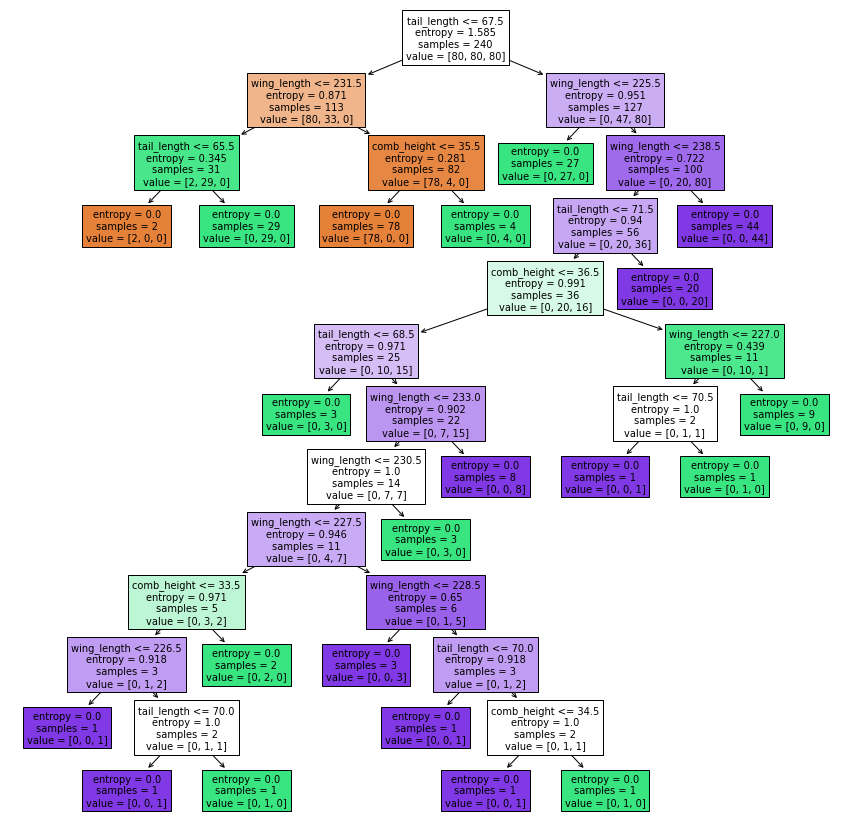

In [34]:
# 트리 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plot_tree(model_tree2, feature_names=['wing_length', 'tail_length', 'comb_height'], filled=True)
plt.show()

-> 트리 구조가 복잡함 (과적합 되었을 확률 높음)

- 분할 기준으로 엔트로피 지수로 이용하고 트리 깊이를 3으로 제한

In [35]:
model_tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(x_train, y_train)
y_pred_tree3 = model_tree3.predict(x_test)
confusion_matrix(y_test, y_pred_tree3)

array([[20,  0,  0],
       [ 1, 14,  5],
       [ 0,  2, 18]])

In [36]:
print(classification_report(y_test, y_pred_tree3))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.88      0.70      0.78        20
           c       0.78      0.90      0.84        20

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.86        60
weighted avg       0.87      0.87      0.86        60



- 정확도가 0.93 -> 0.87로 떨어짐
- 민감도와 정밀도도 낮아짐
- 하지만 0.87 수준의 정확도도 낮은 값은 아님(절대적인 값 기준)

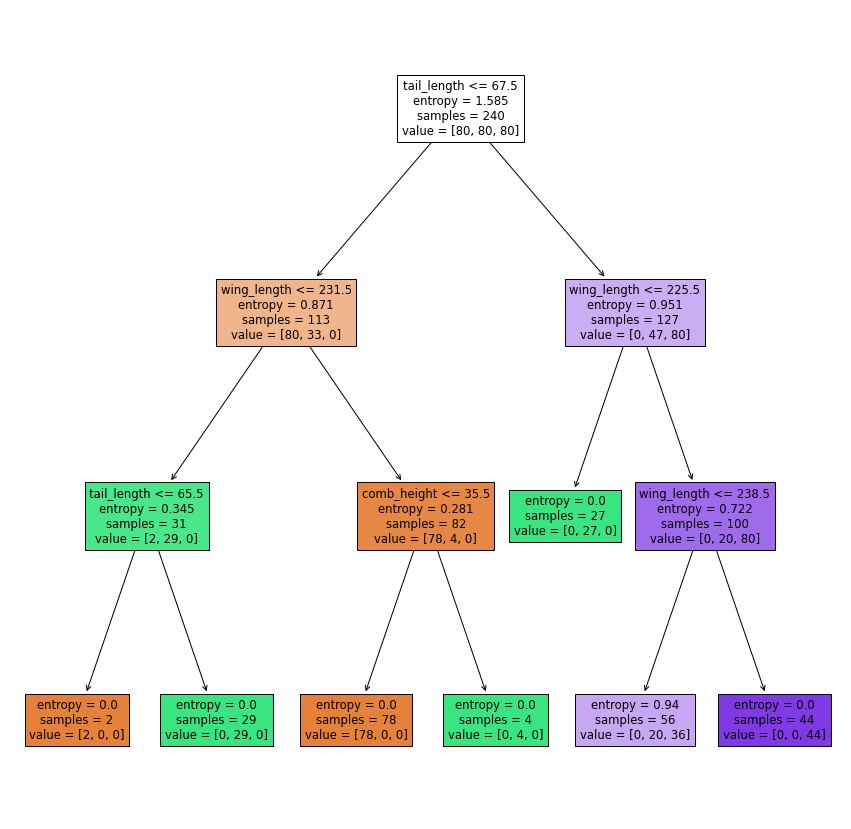

In [37]:
# 트리 그리기
plt.figure(figsize=(15,15))
plot_tree(model_tree3, feature_names=['wing_length', 'tail_length', 'comb_height'], filled=True)
plt.show()

**배깅**
- 배깅(Bagging)은 앙상블(Ensemble) 모형 중 하나
- 앙상블 모형은 여러 개의 예측 모델을 만든 뒤 조합해 하나의 최적화된 최종 예측 모델을 만듦
- 앙상블 모형에는 배깅과 부스팅이 있음

- 배깅은 Boostrap Aggregating의 줄임말로, 학습 데이터셋으로부터 동일한 크기의 표본을 단순 랜덤 복원 추출해 여러개 만들고 각 표본에 대한 예측 모델을 생성한 뒤 결합해 최종 예측 모델을 만듦
- 학습 데이터 셋에서 단순 랜덤 복원 추출해 동일한 크기의 표본을 여러 개 만드는 샘플링 방법을 부트스트랩(Boostrap)이라고 함


In [38]:
# 배깅 알고리즘 수행을 위한 함수 불러옴
from sklearn.ensemble import BaggingClassifier

# 모델 구축 및 학습
model_bag = BaggingClassifier().fit(x_train, y_train)
y_pred_bag = model_bag.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_bag)

array([[20,  0,  0],
       [ 1, 18,  1],
       [ 0,  1, 19]])

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_bag))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.95      0.90      0.92        20
           c       0.95      0.95      0.95        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



- 정확도 0.95, 최소 민감도 0.90, 최소 정밀도 0.95

**부스팅**
- 앙상블 모형 중 하나로 배깅이 부트스트랩 시 각 표본에 동일한 확률을 부여하는 것과 달리 잘못 분류된 표본에 더 큰 가중치를 적용해 새로운 분류 구칙을 만들고, 이러한 과정을 반복해 최종 모형을 만드는 알고리즘

- AdaBoost(Adaptive Boosting), GBM(Gradient Boosting Machine)과 같은 알고리즘이 나오면서 배깅보다 성능이 뛰어난 경우가 많음
- XGBoost의 경우 캐글에서 상위 랭커들이 사용해 높은 인기를 얻은 알고리즘

In [40]:
#에이다부스트 알고리즘 수행을 위한 함수 불러오기
from sklearn.ensemble import AdaBoostClassifier

# 모델 구축 및 학습
model_adb = AdaBoostClassifier().fit(x_train, y_train)
y_pred_adb = model_adb.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_adb)

array([[20,  0,  0],
       [ 1, 16,  3],
       [ 0,  1, 19]])

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.94      0.80      0.86        20
           c       0.86      0.95      0.90        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



- 정확도가 0.92로 높지만 다른 알고리즘 대비 더 뛰어난 수준은 아님

In [42]:
# 그래디언트 부스팅 알고리즘 수행을 위한 함수
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
model_gb = GradientBoostingClassifier().fit(x_train, y_train)
y_pred_gb = model_gb.predict(x_test)
confusion_matrix(y_test,y_pred_gb)

array([[20,  0,  0],
       [ 1, 18,  1],
       [ 0,  2, 18]])

In [44]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.90      0.90      0.90        20
           c       0.95      0.90      0.92        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



-> 정확도 0.93, 에이다부스트 알고리즘 대비 다소 향상됨
- 정밀도와 민감도도 높아짐

**랜덤 포레스트**
- 랜덤 포레스트(Random Forest)는 배깅(Bagging)을 적용한 의사결정나무(Decision Tree)의 앙상블 알고리즘임
- 랜덤 포레스트는 나무가 아닌 나무가 모인 숲의 수준으로 하나의 트리 모델이 아닌 다수의 부트스트랩 표본으로 트리 모델을 만든 뒤 그 결과를 취합해 분류함 
- 분류의 경우 다수결, 회귀의 경우에는 평균을 출력함

- 배깅은 노드마다 모든 독립변수 내에서 최적의 분할을 찾는 방법을 사용하지만, 랜덤 포레스트는 독립변수들을 무작위로 추출하고 추출된 독립변수 내에서 최적의 분할을 만들어가는 방법을 사용함

- 하나의 트리 모델에서 발생할 수 있는 과적합(overfitting) 문제가 랜덤 포레스트에서는 줄어들고 예측 성능 또한 높게 나옴

In [45]:
# 랜덤포레스트 알고리즘 수행을 위한 함수 불러오기
from sklearn.ensemble import RandomForestClassifier

In [46]:
# 모델 구축 및 학습
model_rf = RandomForestClassifier().fit(x_train, y_train)
y_pred_rf =  model_rf.predict(x_test)

confusion_matrix(y_test, y_pred_rf)

array([[20,  0,  0],
       [ 1, 18,  1],
       [ 0,  1, 19]])

In [47]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.95      0.90      0.92        20
           c       0.95      0.95      0.95        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



-> 정확도가 0.93으로 높은편, 정밀도 최소 0.95, 민감도 최소 0.90
- 성능을 더 향상 시킬수 있는 방법은 하이퍼 파라미터 조정 하는 것

**서포트 벡터 머신** SVM(Support Vector Machine)
- 고차원의 공간에서 최적의 분리 초평면(hyperplane)을 찾아 이를 이용해 분류(classification)와 회귀(regression)을 수행하는 알고리즘
- 서포트 벡터는 주어진 데이터 중에서 결정 경계와 가장 가까운 거리에 위치한 데이터를 말함(마진 : 결정 경계에서 서포트 벡터 까지의 거리)
- 결정 경계는 데이터 분류 기준이 되는 경계를 뜻하며, SVM은 결국 최대 마진을 갖는 초평면인 결정 경계를 찾는 알고리즘임

- 데이터를 선형으로 구분하기 불가능할 경우 2차원의 데이터를 3차원으로 변환하면 결정 경계를 찾을 수 있는데, 이런 방법을 커널 트릭(kernel Trick)이라고 하며, 비선형 분류를 위해 데이터를 높은 차원으로 변환시키는 함수를 커널 함수라고 함

- 커널 함수 : 선형, 다항, 가우시안, 시그모이드 등 다양한 함수 존재

In [48]:
# 서포트 벡터 머신 알고리즘 수행
from sklearn.svm import SVC

# 모델 구축
model_svm = SVC(kernel='linear').fit(x_train, y_train)
y_pred_svm = model_svm.predict(x_test)
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

[[20  0  0]
 [ 1 17  2]
 [ 0  1 19]]
              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.94      0.85      0.89        20
           c       0.90      0.95      0.93        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



- 정확도가 0.93이고, 최소 정밀도 0.90 최소 민감도 0.85 

- 예측값을 이용해 svm 모델이 품종별 데이터를 어떻게 분류했는지 확인해봄( 독립변수가 3개지만, 3차원으로 그래프를 그리면 알아보기 어려우므로 x축을 꽁지깃 길이 tail length, y축을 날개 길이 wing_length로만 두고 산점도를 그림

In [49]:
# 예측값을 데이터 프레임으로 만들고 열 이름을 breeds_pred로 지정
df_y_pred_svm = pd.DataFrame(y_pred_svm, columns=['breeds_pred'])

# 기존 test 데이터셋에 svm 예측 결과 합침
df_svm = pd.concat([df_test, df_y_pred_svm], axis=1)

display(df_svm.head())

,wing_length,tail_length,comb_height,breeds,breeds_pred
0,258,67,32,a,a
1,260,64,34,a,a
2,251,63,31,a,a
3,248,63,30,a,a
4,254,62,32,a,a


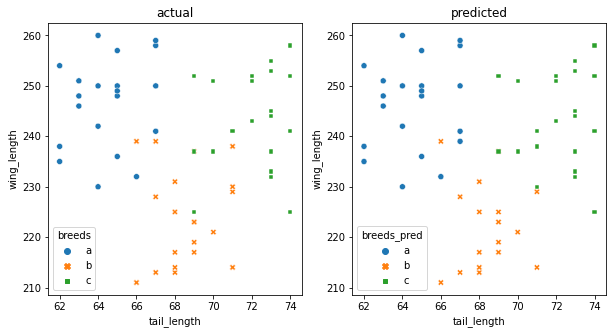

In [50]:
# 실제 값 및 예측값 시각화

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df_svm, x='tail_length', y='wing_length', hue='breeds', style='breeds')
plt.title('actual')
plt.subplot(1,2,2)
sns.scatterplot(data=df_svm, x='tail_length', y='wing_length', hue='breeds_pred', style='breeds_pred')
plt.title('predicted')
plt.show()

**XGBoost와 하이퍼 파라미터 튜닝
- XGBoost는 우수항 성능으로 많은 사람들이 사용하는 인기 알고리즘
- Gradient Boosting 알고리즘을 기반으로 사용
- XGBoost의 경우 병렬 처리를 기반으로 하기 때문에 속도가 빠른 편이며, 과적합 규제 기능이 있음( 분류, 회귀 모두 적용 가능)


In [51]:
# !pip install xgboost

In [52]:
from xgboost import XGBClassifier

In [53]:
# 모델 구축 및 학습
model_xgb = XGBClassifier().fit(x_train, y_train)
y_pred_xgb = model_xgb.predict(x_test)

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[[20  0  0]
 [ 1 18  1]
 [ 0  2 18]]
              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.90      0.90      0.90        20
           c       0.95      0.90      0.92        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



-> 예측 성능까지 확인해 본 결과 정확도 0.93, 최소 민감도 0.90, 최소 정밀도 0.90 우수함

In [54]:
# 그리드 서치 함수 불러오기
from sklearn.model_selection import GridSearchCV

In [55]:
xgb_param_grid = {'eta':[0.05,0.1,0.3,0.5],
                  'gamma' : [0,0.5,1,2],
                  'max_depth':[2,4,8,12]}

In [56]:
# 평가 기준이 정확도인 그리드서치 모델 구축
xgb_grid = GridSearchCV(XGBClassifier(), param_grid=xgb_param_grid, n_jobs=-1, scoring='accuracy')

# 그리드서치 모델 학습
xgb_grid.fit(x_train, y_train)

GridSearchCV(estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'eta': [0.05, 0.1, 0.3, 0.5], 'gamma': [0, 0.5, 1, 2],
                         'max_depth': [2, 4, 8, 12]},
             scoring='accuracy')

In [57]:
# 정확도 최고 점수
xgb_grid.best_score_

0.95

In [58]:
# 정확도 최고 일 때 하이퍼 파라미터
xgb_grid.best_params_

{'eta': 0.05, 'gamma': 0, 'max_depth': 4}

In [59]:
# 선정된 하이퍼 파라미터로 재학습
model_xgb2 = XGBClassifier(eta=0.5, gamma =0, max_depth=8).fit(x_train, y_train)
y_pred_xgb2 = model_xgb2.predict(x_test)

print(confusion_matrix(y_test, y_pred_xgb2))
print(classification_report(y_test, y_pred_xgb2))

[[20  0  0]
 [ 1 18  1]
 [ 0  2 18]]
              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.90      0.90      0.90        20
           c       0.95      0.90      0.92        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



- 오히려 정확도는 0.93으로 다소 떨어짐.
이는 학습과 테스트에서 성능 차이가 발생할 수 있음을 의미하며,
기본값으로 설정된 하이퍼 파라미터가 해당 데이터 셋에는 더 적합함을 의미함

p.268 Q. 효과적인 사육을 위해 사육환경을 분리해보자!(군집 알고리즘)

**군집 알고리즘(Clustering)**

- 위의 분류(classification) 알고리즘과 기본적인 개념이 다름.
- 군집분석은 여러 개의 독립변수들을 활용해 유사한 특징을 갖는 개체들을 몇 개의 군집으로 집단화 시키는 방법
- 독립변수의 특징을 이용해 데이터를 구분하는 것이 목적(종속변수인 라벨이 없다는 점에서 분류 알고리즘과 구분됨)
- 분류 알고리즘은 독립변수와 종속변수 모두 주어진 상태에서 훈련-테스트를 기반해 실전에서 새로운 데이터로 종속변수를 예측하는 지도학습(supervised learning) 알고리즘
- 군집 알고리즘은 독립변수만 주어진 상태에서 독립변수의 유사성을 이용해 지정된 개수(k)의 군집 (종속변수)를 만드는 비지도학습(Unsupervised Learning) 알고리즘임

-----------
- 군집 알고리즘은 계층적(hierarchical) 방법과 비계층적(non-hierarchical)방법으로 나눌 수 있음
- **계층적 군집**은 가장 거리가 가까운 개체들을 결합해 나가는 과정을 반복해 원하는 개수의 군집을 형성해 나감. 개체 간 거리르 계산하는 방법은 유클리디안 거리, 맨해튼 거리, 민코프스키 거리, 표준화 거리, 마할라노비스 거리, 체비세프 거리, 캔버라 거리 등의 계산 법이 있음 (이러한 계산법은 기본적으로 독립변수가 연속형일 때 사용 가능, 독립변수가 범주형 일 경우에는 자카드 계수 사용)
- 군집 간을 연결하는 방법에는 단일연결법, 완전연결법, 평균연결법, 중심연결법, 메디안연결법, 와드연결법 등이 있음

- **비계층적 군집**은 개체 간의 거리가 아닌 주어진 판정 기준을 최적화하는 기법을 사용해 지정한 군집을 형성함.
- 개체 간 거리 행렬을 계산하지 않고, 군집 과정에서 모든 데이터를 저장할 필요가 없기 때문에 계층적 군집 대비 데이터가 상대적으로 많은 경우에 사용함( 예시 k-평균 군집)

**k-평균 군집**
- k-평균 군집 알고리즘은 주어진 데이터를 k개의 군집으로 묶는 알고리즘

In [60]:
cl = pd.read_csv('ch6-3.csv')
cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   breeds  100 non-null    object
 1   weight  100 non-null    int64 
 2   food    100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [61]:
cl.head()

,breeds,weight,food
0,a,2765,217
1,a,2843,235
2,a,2678,207
3,a,2595,204
4,a,2734,226


- 데이터 셋은 총 3개의 열과 100개의 행으로 구성됨
- 품종(breeds) 열은 범주형 문자(object) 데이터로 'a' 품종의 데이터만 입력되어 있음
- 몸무게(weight), 하루 평균 사료 섭취량(food) 열은 연속형(int) 수치

In [62]:
cl.describe()

,weight,food
count,100.000000,100.000000
mean,2695.740000,212.960000
std,178.103399,18.758389
min,2403.000000,178.000000
25%,2551.250000,197.000000
50%,2694.000000,214.000000
75%,2833.500000,228.000000
max,2999.000000,249.000000


- 몸무게가 가장 적은 개체는 2,403g, 가장 많이 나가는 개체는 2,999g 으로 596g 차이가 남 

- 산점도를 통해 하루 평균 사료 섭취량(food)에 다른 몸무게(weight) 데이터가 어떻게 분포되었는지 확인

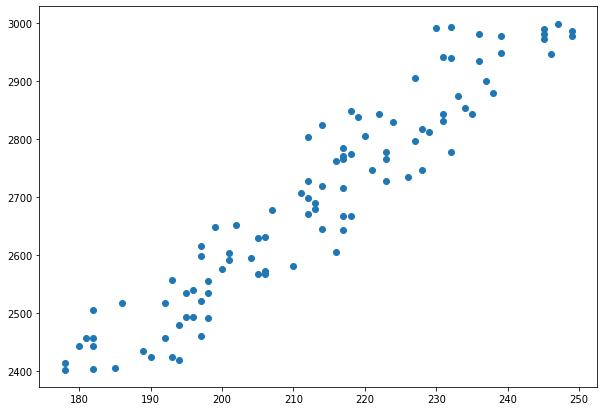

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(x=cl['food'], y=cl['weight'])
plt.show()

- 하류 평균 사료 섭취량이 많은 개체가 몸무게도 많이 나간다는 것을 확인할 수 있음
- 이 데이터를 활용해 100마리의 닭을 효과적으로 사육하기 위해 3개의 군집으로 나눠 봄

In [69]:
# k-means 군집 알고리즘 수행을 위한 함수 불러오기

from sklearn.cluster import KMeans

cl_n = cl.iloc[:,1:3].values

# 연속형 데이터만으로 군집 실행
cl_kmc = KMeans(n_clusters =3).fit(cl_n)

# 군집 결과 확인
cl_kmc.labels_

array([0, 1, 0, 2, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 0,
       1, 0, 1, 0, 2, 0, 1, 2, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 2, 2,
       2, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 1, 2,
       1, 1, 1, 2, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 1], dtype=int32)

In [70]:
# 군집별 개수 확인

import numpy as np
np.unique(cl_kmc.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([34, 29, 37]))

 - 군집별 개수는 numpy 패키지의 unique() 함수를 이용해 확인
 - k-평균 군집 결과, 3개의 군집(0,1,2)로 나뉘고 각각은 35,38,27개 개체를 포함함


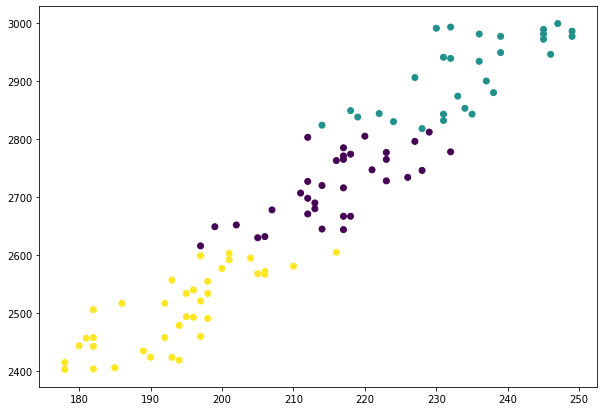

In [72]:
plt.figure(figsize=(10,7))
plt.scatter(x=cl['food'], y=cl['weight'], c= cl_kmc.labels_)
plt.show()